In [2]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('USA_Housing.csv')
X = df.drop(['Price','Address'], axis=1)
y = df['Price']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [12]:
model = SVR(C=300000)
model.fit(x_train, y_train)
y_a = model.predict(x_train)
y_p = model.predict(x_test)
print('--------Coeficiente de determinación--------')
print('El coeficiente para la prueba es {:.2f}'.format(r2_score(y_test, y_p)))
print('El coeficiente para el entrenamiento es {:.2f}'.format(r2_score(y_train, y_a)))

--------Coeficiente de determinación--------
El coeficiente para la prueba es 0.91
El coeficiente para el entrenamiento es 0.92


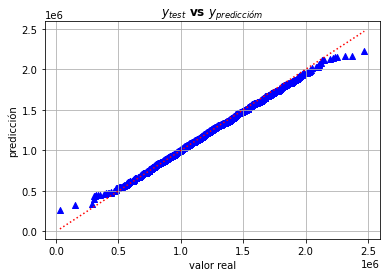

In [13]:
y_p = np.sort(y_p)
y_test = y_test.sort_values()
plt.figure()
plt.scatter(y_test, y_p, color='b', marker='^')
plt.plot(y_test, y_test, color ='r', linestyle='dotted')
plt.xlabel('valor real')
plt.ylabel('predicción')
plt.title('$y_{test}$ vs $y_{prediccióm}$', fontweight="bold")
plt.grid()